In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#from google.colab import drive
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
#drive.mount('/content/drive')

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
matrix = iris_dataset["data"]
matrix.shape

(150, 4)

In [5]:

iris_dataset = datasets.load_iris()
label = iris_dataset["target"]
label.shape

(150,)

In [6]:
train_matrix, test_matrix, train_label, test_label = train_test_split(matrix, label, test_size=0.2, random_state=42)
print(train_matrix.shape)
print(train_label.shape)
print(test_matrix.shape)
print(test_label.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [7]:
model = GaussianNB()
model.fit(train_matrix, train_label)

,priors,None
,var_smoothing,1e-09


In [8]:
train_predict = model.predict(train_matrix)
test_predict = model.predict(test_matrix)

In [9]:
print("--- Accuracy (Train) ---")
print(accuracy_score(train_label, train_predict))
print("--- Accuracy (Test) ---")
print(accuracy_score(test_label, test_predict))

--- Accuracy (Train) ---
0.95
--- Accuracy (Test) ---
1.0


In [10]:
print("--- Classification Report (train) ---")
print(classification_report(train_label, train_predict))

--- Classification Report (train) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.93      0.93        41
           2       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [11]:
print(classification_report(test_label, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



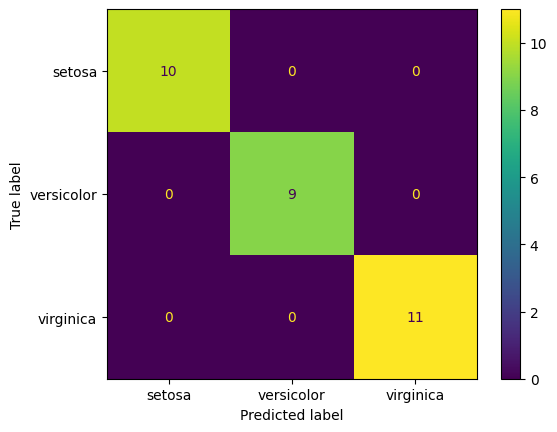

In [12]:
cm = confusion_matrix(test_label, test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_dataset.target_names)
disp.plot()
plt.show()

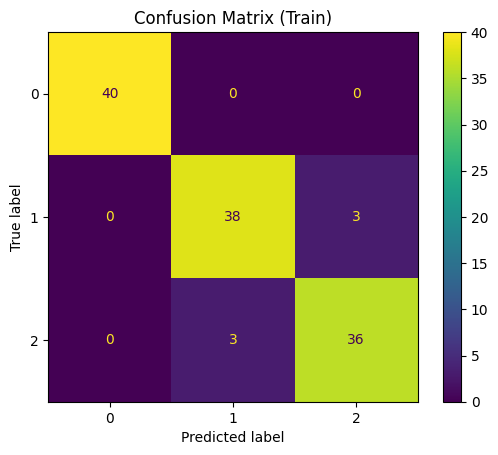

In [13]:
cm = confusion_matrix(train_label, train_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix (Train)")
plt.show()

In [14]:
pca = PCA(n_components=2)
pca.fit(train_matrix)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [15]:
test_pca_matrix = pca.transform(test_matrix)
train_pca_matrix = pca.transform(train_matrix)

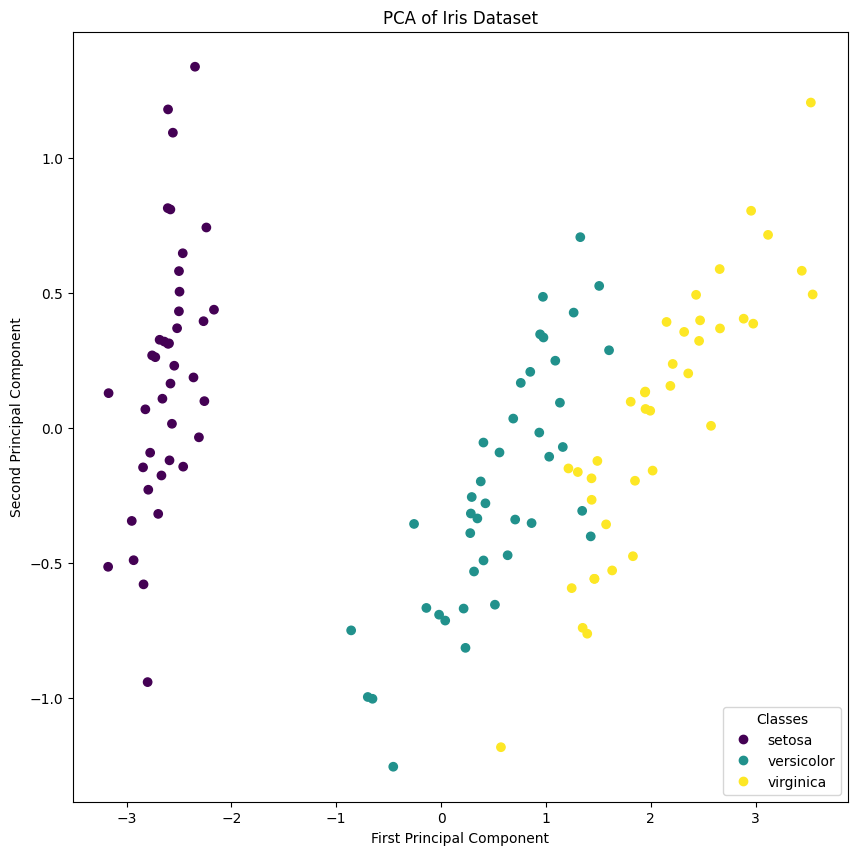

In [16]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(train_pca_matrix[:, 0], train_pca_matrix[:, 1], c=train_label)
plt.legend(handles=fig.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'], loc="lower right", title="Classes")
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [17]:
model = GaussianNB()
model.fit(train_pca_matrix, train_label)
train_predict = model.predict(train_pca_matrix)
test_predict = model.predict(test_pca_matrix)

print(accuracy_score(train_label, train_predict))
print(accuracy_score(test_label, test_predict))



0.9
0.9333333333333333


In [18]:
print(classification_report(test_label, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



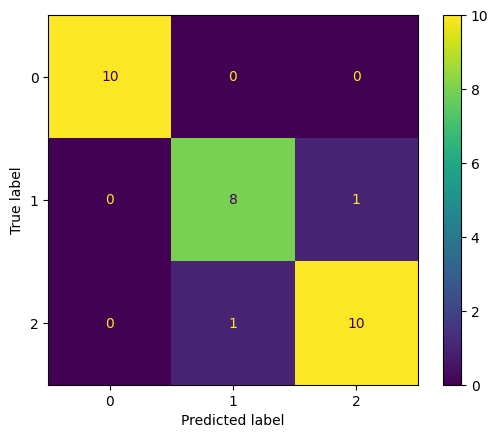

In [19]:
cm = confusion_matrix(test_label, test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

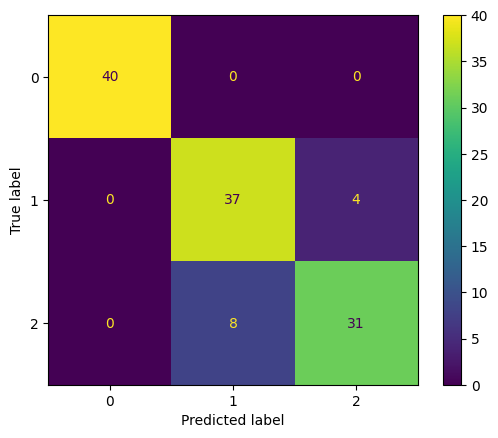

In [20]:
cm = confusion_matrix(train_label, train_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

model = lda()
model.fit(train_matrix, train_label)
test_predict = model.predict(test_matrix)
train_predict = model.predict(train_matrix)


print(accuracy_score(train_label, train_predict))
print(accuracy_score(test_label, test_predict))

0.975
1.0


In [22]:
print(classification_report(test_label, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
print(classification_report(train_label, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



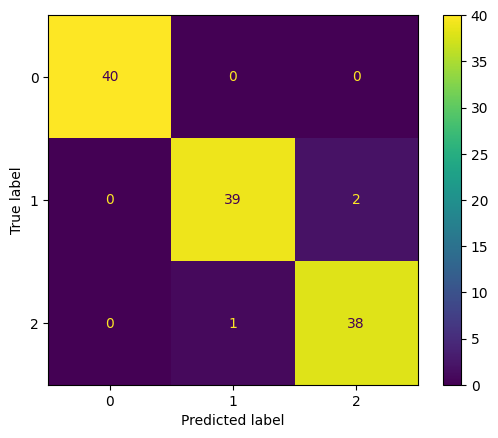

In [24]:
cm = confusion_matrix(train_label, train_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

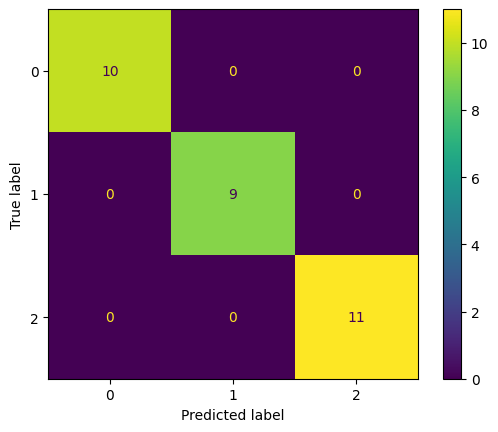

In [25]:
cm = confusion_matrix(test_label, test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [27]:
print("\n--- Quadratic Discriminant Analysis (QDA) ---")

model_qda = QDA()
model_qda.fit(train_matrix, train_label)

train_predict_qda = model_qda.predict(train_matrix)
test_predict_qda = model_qda.predict(test_matrix)


--- Quadratic Discriminant Analysis (QDA) ---


In [28]:
print("--- Accuracy (Train QDA) ---")
print(accuracy_score(train_label, train_predict_qda))
print("--- Accuracy (Test QDA) ---")
print(accuracy_score(test_label, test_predict_qda))

--- Accuracy (Train QDA) ---
0.975
--- Accuracy (Test QDA) ---
0.9666666666666667


In [29]:

print("\n--- Classification Report (Train QDA) ---")
print(classification_report(train_label, train_predict_qda))
print("\n--- Classification Report (Test QDA) ---")
print(classification_report(test_label, test_predict_qda))


--- Classification Report (Train QDA) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120


--- Classification Report (Test QDA) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30




--- Confusion Matrix (Train QDA) ---


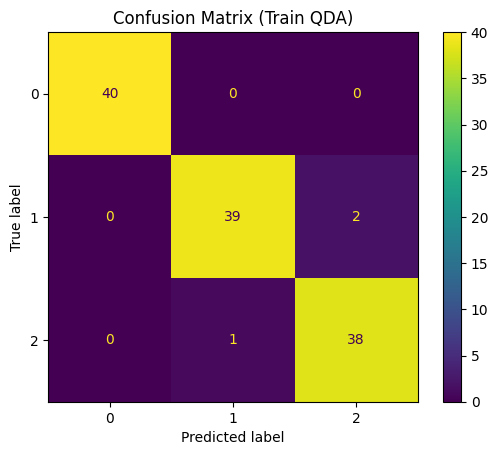

In [30]:
print("\n--- Confusion Matrix (Train QDA) ---")
cm_train_qda = confusion_matrix(train_label, train_predict_qda)
disp_train_qda = ConfusionMatrixDisplay(confusion_matrix=cm_train_qda, display_labels=model_qda.classes_)
disp_train_qda.plot()
plt.title("Confusion Matrix (Train QDA)")
plt.show()


--- Confusion Matrix (Test QDA) ---


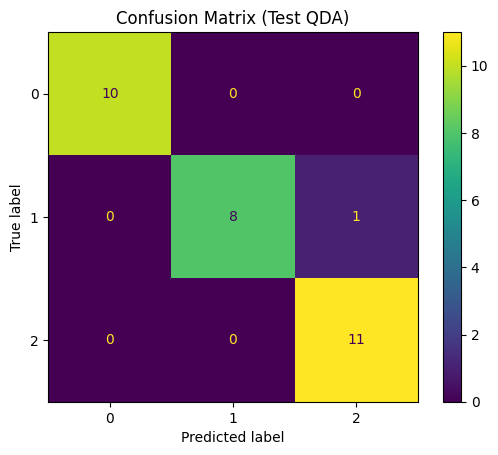


QDA analysis complete. Confusion matrices displayed.


In [31]:
print("\n--- Confusion Matrix (Test QDA) ---")
cm_test_qda = confusion_matrix(test_label, test_predict_qda)
disp_test_qda = ConfusionMatrixDisplay(confusion_matrix=cm_test_qda, display_labels=model_qda.classes_)
disp_test_qda.plot()
plt.title("Confusion Matrix (Test QDA)")
plt.show()
print("\nQDA analysis complete. Confusion matrices displayed.")